<h3 align=center> Group 1: Lakshmi Pravallika Muttineni, Prabhukanth Potlapalli, Sanjay Nimmagadda, Sravani Chada <br>
IST 5520 Project Proposal <br>
10/30/2022 </h3> 


<h2> Introduction </h2>

<p> The Crime Prediction is one of the important topics in recent years that aims to help make the job easier for the police. We have chosen the complaint data, which is published by the New York police department (NYPD), to reflect every felony, misdemeanor, and violation crime that has taken place in New York City so far this year (2022). We decided to dig deeper into the data to see if there are any underlying patterns or relationships that could explain the reasons for the high crime rate in New York City. For this project, we plan to build a model that predicts the possible crime locations and the suspects based on the historic data. This model can be helpful in suggesting areas and schedules for patrolling.</p>

<h2> Data </h2>

<p> The dataset was provided by the NYPD. It is a breakdown of every criminal complaint report filed in NYC by the NYPD for the current calendar year. The data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents a criminal complaint in NYC and includes information about the type of crime, the location, and time of enforcement. The information related to victim and suspect demographics is also included. It has 257k records and 36 columns. </p>

### Read Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns



In [2]:
#Import Dataset
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date.csv')
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,69,BROOKLYN,01/01/2015,00:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,42,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,123,STATEN ISLAND,03/20/2022,11:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,121,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,42,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256797 entries, 0 to 256796
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                256797 non-null  object 
 1   ADDR_PCT_CD               256797 non-null  int64  
 2   BORO_NM                   256797 non-null  object 
 3   CMPLNT_FR_DT              256797 non-null  object 
 4   CMPLNT_FR_TM              256797 non-null  object 
 5   CMPLNT_TO_DT              237423 non-null  object 
 6   CMPLNT_TO_TM              256797 non-null  object 
 7   CRM_ATPT_CPTD_CD          256797 non-null  object 
 8   HADEVELOPT                256797 non-null  object 
 9   HOUSING_PSA               16985 non-null   float64
 10  JURISDICTION_CODE         256797 non-null  int64  
 11  JURIS_DESC                256797 non-null  object 
 12  KY_CD                     256797 non-null  int64  
 13  LAW_CAT_CD                256797 non-null  o


## Data Preprocessing

There are few values in the file where they are uploaded as '(null)' replacing them with nan values.

In [4]:
df.replace('(null)',np.nan,inplace= True)


In [5]:
df.isnull().sum()


CMPLNT_NUM                       0
ADDR_PCT_CD                      0
BORO_NM                        441
CMPLNT_FR_DT                     0
CMPLNT_FR_TM                     0
CMPLNT_TO_DT                 19374
CMPLNT_TO_TM                 19319
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                  255982
HOUSING_PSA                 239812
JURISDICTION_CODE                0
JURIS_DESC                       0
KY_CD                            0
LAW_CAT_CD                       0
LOC_OF_OCCUR_DESC            41066
OFNS_DESC                        6
PARKS_NM                    255376
PATROL_BORO                      4
PD_CD                          269
PD_DESC                        269
PREM_TYP_DESC                  107
RPT_DT                           0
STATION_NAME                251089
SUSP_AGE_GROUP               50792
SUSP_RACE                    50792
SUSP_SEX                     50792
TRANSIT_DISTRICT            251089
VIC_AGE_GROUP                    0
VIC_RACE            

In [6]:
df.fillna(np.nan,inplace = True)


In [7]:
df.drop_duplicates(inplace = True)


In [8]:
df.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT','HADEVELOPT','PARKS_NM', 'STATION_NAME','Lat_Lon', 'New Georeferenced Column'],inplace= True)


Dropping'HOUSING_PSA','TRANSIT_DISTRICT','HADEVELOPT','PARKS_NM', 'STATION_NAME' Columns as more than 90% of their values are null. Dropping'Lat_Lon', 'New Georeferenced Column' as this information is already present in Latitude and Longitude columns


In [9]:
df.dropna(inplace= True)


In [10]:
df.isna().sum()


CMPLNT_NUM           0
ADDR_PCT_CD          0
BORO_NM              0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
CMPLNT_TO_DT         0
CMPLNT_TO_TM         0
CRM_ATPT_CPTD_CD     0
JURISDICTION_CODE    0
JURIS_DESC           0
KY_CD                0
LAW_CAT_CD           0
LOC_OF_OCCUR_DESC    0
OFNS_DESC            0
PATROL_BORO          0
PD_CD                0
PD_DESC              0
PREM_TYP_DESC        0
RPT_DT               0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64

In [11]:
df.shape


(163513, 29)

In [12]:
df['SUSP_AGE_GROUP'].value_counts()


UNKNOWN    78349
25-44      49963
45-64      17705
18-24      11831
<18         3647
65+         2000
2022          11
-74            1
-969           1
-1             1
-5962          1
-961           1
-10            1
-941           1
Name: SUSP_AGE_GROUP, dtype: int64

Replacing UNKNOWN age group with mode of the data instead of deleting as it may cause lot of loss of information

In [13]:
df['SUSP_AGE_GROUP'].replace('UNKNOWN','25-44',inplace=True)
df['SUSP_AGE_GROUP'].value_counts()


25-44    128312
45-64     17705
18-24     11831
<18        3647
65+        2000
2022         11
-74           1
-969          1
-1            1
-5962         1
-961          1
-10           1
-941          1
Name: SUSP_AGE_GROUP, dtype: int64

In [14]:
df= df[~df['SUSP_AGE_GROUP'].isin(['2022', '-74','-969','-1','-5962','-961','-10','-941'])]
df['SUSP_AGE_GROUP'].value_counts()



25-44    128312
45-64     17705
18-24     11831
<18        3647
65+        2000
Name: SUSP_AGE_GROUP, dtype: int64

In [15]:
df['SUSP_RACE'].value_counts()


BLACK                             58342
UNKNOWN                           49872
WHITE HISPANIC                    25611
WHITE                             15866
BLACK HISPANIC                     7627
ASIAN / PACIFIC ISLANDER           5830
AMERICAN INDIAN/ALASKAN NATIVE      347
Name: SUSP_RACE, dtype: int64

In [16]:
df['SUSP_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df['SUSP_RACE'].value_counts()


BLACK                             108214
WHITE HISPANIC                     25611
WHITE                              15866
BLACK HISPANIC                      7627
ASIAN / PACIFIC ISLANDER            5830
AMERICAN INDIAN/ALASKAN NATIVE       347
Name: SUSP_RACE, dtype: int64

In [17]:
df['VIC_AGE_GROUP'].value_counts()


25-44      58412
UNKNOWN    45926
45-64      30563
18-24      14369
65+         7783
<18         6432
-65            2
-5             1
-934           1
-40            1
-4             1
-964           1
-955           1
-959           1
-963           1
Name: VIC_AGE_GROUP, dtype: int64

In [18]:
df['VIC_AGE_GROUP'].replace('UNKNOWN','25-44',inplace=True)
df['VIC_AGE_GROUP'].value_counts()


25-44    104338
45-64     30563
18-24     14369
65+        7783
<18        6432
-65           2
-5            1
-934          1
-40           1
-4            1
-964          1
-955          1
-959          1
-963          1
Name: VIC_AGE_GROUP, dtype: int64

In [19]:
df= df[~df['VIC_AGE_GROUP'].isin(['-65', '-5','-934','-40','-4','-964','-955','-959','-963'])]
df['VIC_AGE_GROUP'].value_counts()

25-44    104338
45-64     30563
18-24     14369
65+        7783
<18        6432
Name: VIC_AGE_GROUP, dtype: int64

In [20]:
df['VIC_RACE'].value_counts()


UNKNOWN                           48611
BLACK                             42759
WHITE HISPANIC                    28917
WHITE                             23344
ASIAN / PACIFIC ISLANDER          12666
BLACK HISPANIC                     6636
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: VIC_RACE, dtype: int64

In [21]:
df['VIC_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df['VIC_RACE'].value_counts()


BLACK                             91370
WHITE HISPANIC                    28917
WHITE                             23344
ASIAN / PACIFIC ISLANDER          12666
BLACK HISPANIC                     6636
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: VIC_RACE, dtype: int64

In [22]:
df['SUSP_SEX'].value_counts()


M    94905
U    41316
F    27264
Name: SUSP_SEX, dtype: int64

In [23]:
df['SUSP_SEX'].replace('U','M',inplace=True)
df['SUSP_SEX'].value_counts()


M    136221
F     27264
Name: SUSP_SEX, dtype: int64

In [24]:
df['VIC_SEX'].value_counts()


F    68103
M    52434
D    36781
E     6167
Name: VIC_SEX, dtype: int64

In [25]:
df['VIC_SEX'].replace('E','D',inplace=True)
df['VIC_SEX'].value_counts()


F    68103
M    52434
D    42948
Name: VIC_SEX, dtype: int64

In [26]:
df.dropna(inplace=True)
df.reset_index(drop= True, inplace=True)


In [27]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce',format = "%m/%d/%Y" )
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'],errors='coerce',format = "%m/%d/%Y" )
FR_DY = df['CMPLNT_FR_DT'].dt.day_name()
TO_DY = df['CMPLNT_TO_DT'].dt.day_name()


In [28]:
FR_DY

0         Thursday
1         Thursday
2          Tuesday
3           Friday
4           Friday
            ...   
163480    Thursday
163481    Thursday
163482    Thursday
163483    Thursday
163484    Thursday
Name: CMPLNT_FR_DT, Length: 163485, dtype: object

In [29]:
TO_DY


0          Thursday
1          Thursday
2           Tuesday
3            Friday
4         Wednesday
            ...    
163480     Thursday
163481     Thursday
163482     Thursday
163483     Thursday
163484     Thursday
Name: CMPLNT_TO_DT, Length: 163485, dtype: object

In [30]:
df = pd.concat([df,FR_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_DAY']


In [31]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLNT_FR_DAY
0,242250195,42,BRONX,2022-03-17,15:23:00,2022-03-17,15:28:00,ATTEMPTED,0,N.Y. POLICE DEPT,...,BLACK,M,25-44,BLACK,D,1010419,242374,40.831899,-73.905435,Thursday
1,242643555,121,STATEN ISLAND,2022-03-24,15:00:00,2022-03-24,22:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,18-24,BLACK,F,942822,166353,40.623188,-74.149238,Thursday
2,242816732,42,BRONX,2022-03-29,15:24:00,2022-03-29,15:30:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,Tuesday
3,238863220,25,MANHATTAN,2021-12-31,21:45:00,2021-12-31,21:50:00,COMPLETED,2,N.Y. HOUSING POLICE,...,WHITE HISPANIC,F,25-44,BLACK,M,1002844,230571,40.799522,-73.932838,Friday
4,242870934,46,BRONX,2018-03-16,12:00:00,2022-03-30,22:57:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,25-44,WHITE HISPANIC,F,1007476,247738,40.846629,-73.916050,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163480,247415547,67,BROOKLYN,2022-06-30,07:30:00,2022-06-30,07:45:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,18-24,BLACK,F,1004537,181012,40.663492,-73.926872,Thursday
163481,247392103,40,BRONX,2022-06-30,18:05:00,2022-06-30,18:15:00,ATTEMPTED,0,N.Y. POLICE DEPT,...,BLACK,M,25-44,BLACK,D,1007667,237199,40.817703,-73.915395,Thursday
163482,247392173,109,QUEENS,2022-06-30,18:38:00,2022-06-30,18:48:00,COMPLETED,0,N.Y. POLICE DEPT,...,WHITE HISPANIC,M,45-64,WHITE HISPANIC,M,1036784,224128,40.781700,-73.810305,Thursday
163483,247399166,33,MANHATTAN,2022-06-30,22:10:00,2022-06-30,22:25:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,45-64,BLACK,M,1001528,244950,40.838991,-73.937557,Thursday


In [32]:
df = pd.concat([df,TO_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_DAY']


In [33]:
fr_hr = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour 
to_hr = pd.to_datetime(df['CMPLNT_TO_TM'], format='%H:%M:%S').dt.hour


In [34]:
df = pd.concat([df,fr_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_PART']


In [35]:
df = pd.concat([df,to_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_PART']


In [36]:
def f(x=0):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [37]:
df['CMPLNT_FR_PART'] = df['CMPLNT_FR_PART'].apply(lambda z: f(z))


In [38]:
df['CMPLNT_TO_PART'] = df['CMPLNT_TO_PART'].apply(lambda z: f(z))


In [39]:
df['CMPLNT_FR_PART']


0                  Noon
1                  Noon
2                  Noon
3                 Night
4               Morning
              ...      
163480    Early Morning
163481          Evening
163482          Evening
163483            Night
163484             Noon
Name: CMPLNT_FR_PART, Length: 163485, dtype: object

In [40]:
df['CMPLNT_TO_PART']


0                  Noon
1                 Night
2                  Noon
3                 Night
4                 Night
              ...      
163480    Early Morning
163481          Evening
163482          Evening
163483            Night
163484             Noon
Name: CMPLNT_TO_PART, Length: 163485, dtype: object

In [41]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLNT_FR_DAY,CMPLNT_TO_DAY,CMPLNT_FR_PART,CMPLNT_TO_PART
0,242250195,42,BRONX,2022-03-17,15:23:00,2022-03-17,15:28:00,ATTEMPTED,0,N.Y. POLICE DEPT,...,BLACK,D,1010419,242374,40.831899,-73.905435,Thursday,Thursday,Noon,Noon
1,242643555,121,STATEN ISLAND,2022-03-24,15:00:00,2022-03-24,22:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,F,942822,166353,40.623188,-74.149238,Thursday,Thursday,Noon,Night
2,242816732,42,BRONX,2022-03-29,15:24:00,2022-03-29,15:30:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,1010131,240105,40.825670,-73.906484,Tuesday,Tuesday,Noon,Noon
3,238863220,25,MANHATTAN,2021-12-31,21:45:00,2021-12-31,21:50:00,COMPLETED,2,N.Y. HOUSING POLICE,...,BLACK,M,1002844,230571,40.799522,-73.932838,Friday,Friday,Night,Night
4,242870934,46,BRONX,2018-03-16,12:00:00,2022-03-30,22:57:00,COMPLETED,0,N.Y. POLICE DEPT,...,WHITE HISPANIC,F,1007476,247738,40.846629,-73.916050,Friday,Wednesday,Morning,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163480,247415547,67,BROOKLYN,2022-06-30,07:30:00,2022-06-30,07:45:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,F,1004537,181012,40.663492,-73.926872,Thursday,Thursday,Early Morning,Early Morning
163481,247392103,40,BRONX,2022-06-30,18:05:00,2022-06-30,18:15:00,ATTEMPTED,0,N.Y. POLICE DEPT,...,BLACK,D,1007667,237199,40.817703,-73.915395,Thursday,Thursday,Evening,Evening
163482,247392173,109,QUEENS,2022-06-30,18:38:00,2022-06-30,18:48:00,COMPLETED,0,N.Y. POLICE DEPT,...,WHITE HISPANIC,M,1036784,224128,40.781700,-73.810305,Thursday,Thursday,Evening,Evening
163483,247399166,33,MANHATTAN,2022-06-30,22:10:00,2022-06-30,22:25:00,COMPLETED,0,N.Y. POLICE DEPT,...,BLACK,M,1001528,244950,40.838991,-73.937557,Thursday,Thursday,Night,Night


## Data Visualization

### 1. Types of Crime

<AxesSubplot:title={'center':'Types of Crimes'}>

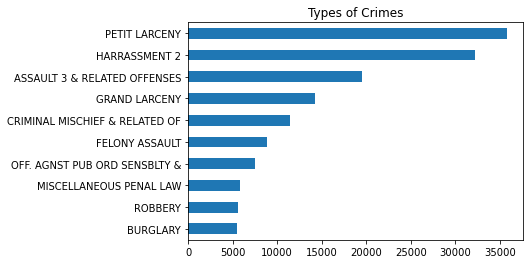

In [42]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")


### 2. Distribution of Crime in each borough


<AxesSubplot:title={'center':'Total of Crime Events by Borough'}>

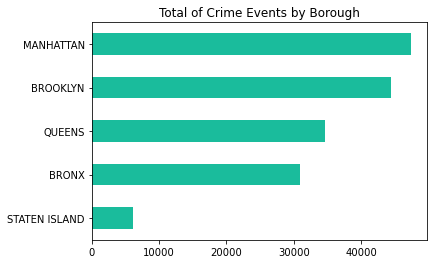

In [43]:
df['BORO_NM'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough')


### 3. Analyzing specific crime

<AxesSubplot:title={'center':'Sex crime reports'}>

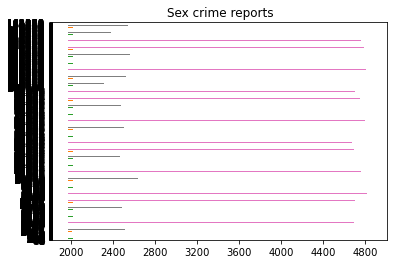

In [44]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.plot(kind='barh', title = 'Sex crime reports', legend= False)

### 4. Analyzing the Victims



<AxesSubplot:title={'center':'Victims By Gender'}>

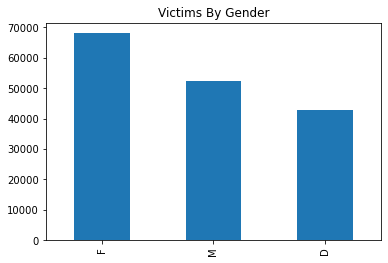

In [45]:
df['VIC_SEX'].value_counts().plot(kind = 'bar',title = 'Victims By Gender')


<AxesSubplot:title={'center':'Victims By Race'}>

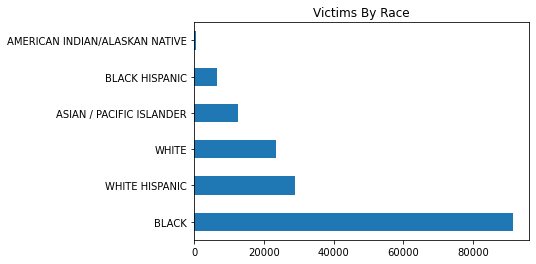

In [46]:
df['VIC_RACE'].value_counts().plot(kind = 'barh',title = 'Victims By Race')


<AxesSubplot:title={'center':'Victims By Age Group'}>

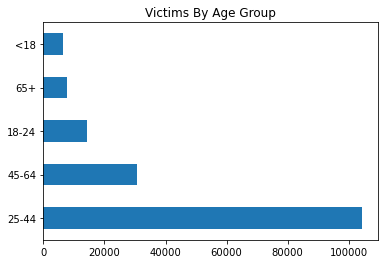

In [47]:
df['VIC_AGE_GROUP'].value_counts().plot(kind = 'barh',title = 'Victims By Age Group')


### 5.Analyzing the Suspects

<AxesSubplot:title={'center':'Suspects By Gender'}>

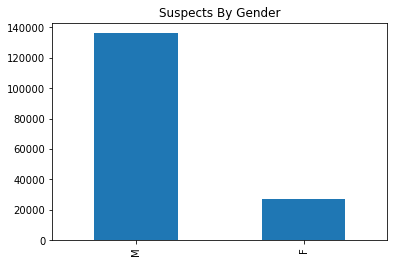

In [48]:
df['SUSP_SEX'].value_counts().plot(kind = 'bar',title = 'Suspects By Gender')


<AxesSubplot:title={'center':'Suspects By Race'}>

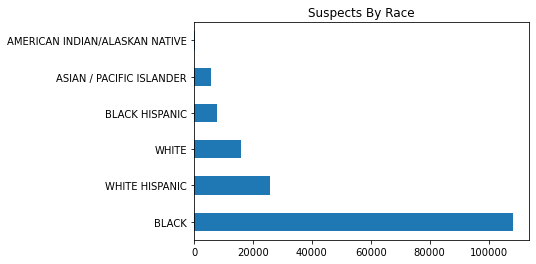

In [49]:
df['SUSP_RACE'].value_counts().plot(kind = 'barh',title = 'Suspects By Race')


<AxesSubplot:title={'center':'Suspects By Age Group'}>

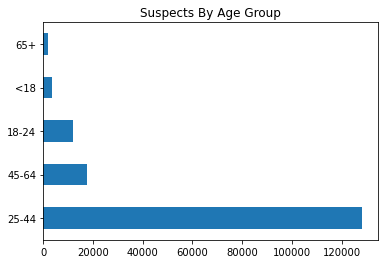

In [50]:
df['SUSP_AGE_GROUP'].value_counts().plot(kind = 'barh',title = 'Suspects By Age Group')


## Data Normalization